In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\aaron\OneDrive\Desktop\Health Insurance Analysis'

In [4]:
path

'C:\\Users\\aaron\\OneDrive\\Desktop\\Health Insurance Analysis'

In [5]:
# installing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'updated_region.csv'), index_col = False)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,West,16884.92
1,18,male,33.8,1,no,South,1725.55
2,28,male,33.0,3,no,South,4449.46
3,33,male,22.7,0,no,Midwest,21984.47
4,32,male,28.9,0,no,Midwest,3866.86


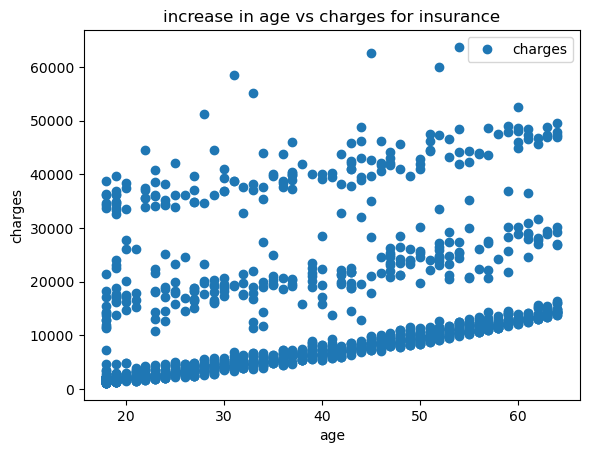

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='charges',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('increase in age vs charges for insurance')  
plt.xlabel('age')  
plt.ylabel('charges')  
plt.show()

# hypothesis
* people over the age of 40 have a higher health insurance than people below.

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['charges'].values.reshape(-1,1)

In [10]:
X

array([[19],
       [18],
       [28],
       ...,
       [18],
       [21],
       [61]], dtype=int64)

In [11]:
y

array([[16884.92],
       [ 1725.55],
       [ 4449.46],
       ...,
       [ 1629.83],
       [ 2007.94],
       [29141.36]])

In [12]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [14]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

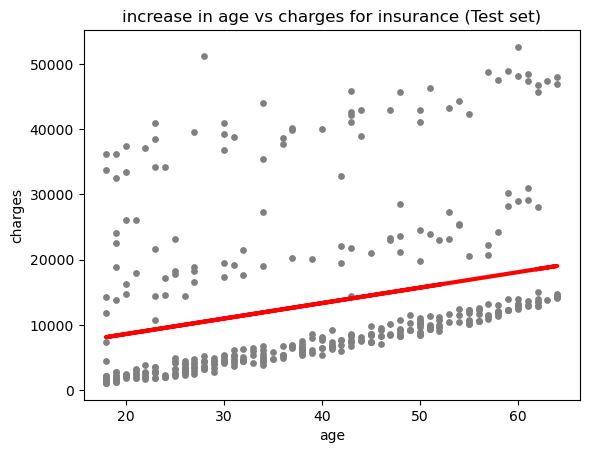

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('increase in age vs charges for insurance (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('charges')
plot_test.show()

In [18]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [19]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[236.87730387]]
Mean squared error:  141816779.5835062
R2 score:  0.1106963273159054


In [20]:
y_predicted

array([[16200.71583599],
       [15016.32931664],
       [15253.20662051],
       [18332.61157082],
       [15963.83853212],
       [11936.92436633],
       [ 8146.8875044 ],
       [15963.83853212],
       [12884.43358181],
       [11226.29245472],
       [11936.92436633],
       [15726.96122825],
       [14068.82010116],
       [11700.04706246],
       [10278.78323924],
       [15726.96122825],
       [18095.73426695],
       [10041.90593537],
       [12884.43358181],
       [ 8620.64211214],
       [15963.83853212],
       [17148.22505147],
       [16200.71583599],
       [15016.32931664],
       [ 9094.39671988],
       [11463.16975859],
       [10515.66054311],
       [13358.18818955],
       [11226.29245472],
       [14542.5747089 ],
       [13358.18818955],
       [17858.85696308],
       [18569.48887469],
       [16911.3477476 ],
       [ 9568.15132762],
       [10989.41515085],
       [14779.45201277],
       [10515.66054311],
       [13358.18818955],
       [ 8620.64211214],


In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,9724.53,16200.715836
1,8547.69,15016.329317
2,45702.02,15253.206621
3,12950.07,18332.611571
4,9644.25,15963.838532
5,4500.34,11936.924366
6,2198.19,8146.887504
7,11436.74,15963.838532
8,7537.16,12884.433582
9,5425.02,11226.292455


compare how the regression fits the training set

In [23]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [24]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [25]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[236.87730387]]
Mean squared error:  129980520.4310698
R2 score:  0.07806233202767288


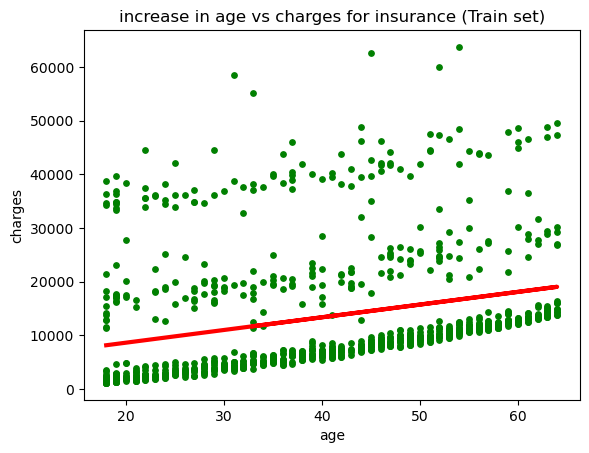

In [26]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('increase in age vs charges for insurance (Train set)')
plot_test.xlabel('age')
plot_test.ylabel('charges')
plot_test.show()

# Slope: [[236.87730387]]

This represents the coefficient (slope) of the regression line. In linear regression, this value shows the relationship between the independent variable (X) and the dependent variable (Y). Specifically, for every 1-unit increase in the independent variable, the dependent variable will increase by approximately 236.88 units.


# MSE Mean Squared Error (MSE): 129980520.4310698
is a measure of how well the model is predicting the target variable. It calculates the average squared difference between the actual values and the predicted values. A lower MSE indicates better model performance. Here, a value of 129,980,520 suggests that the model is not fitting the data perfectly, and there’s quite a bit of error in its predictions.

# The R² score (also called the coefficient of determination) R² Score (R-squared): 0.07806233202767288
indicates how well the regression model explains the variation in the dependent variable. It ranges from 0 to 1, where 1 means the model perfectly predicts the target, and 0 means the model doesn't explain any of the variation. In this case, an R² of 0.078 means that the model explains only about 7.8% of the variance in the data, which is quite low. This suggests that the model may not be very effective at capturing the relationship between the variables, or the data may be very noisy.